In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

from sklearn.feature_selection import chi2
from scipy.sparse import csr_matrix

## Data loading

In [ ]:
data = pd.read_csv("/content/dataset.csv")
data

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
0,3.0,3.0,689.0,18.000000,6.0,890.0,6.000000,39.0,17.000000,88.000000,...,-208196.847822,149454.443336,330552.774213,133907.410063,44038.800343,55156.067737,-77588.974897,171979.000000,162674.0,2
1,3.0,3.0,583.0,15.000000,5.0,1574.0,8640.382774,6.0,7.000000,30.000000,...,36209.864030,221318.549792,-1568.194718,22651.037591,-144906.975987,-33489.566102,157701.356695,7702.000000,6551.0,8
2,3.0,4.0,2796.0,15.000000,5.0,625.0,5.000000,58.0,11.000000,152.000000,...,88398.670923,66550.556919,5404.362294,13947.925003,-48559.885445,257023.562444,-204889.973046,151324.169975,12946.0,6
3,3.0,3.0,373.0,2726.071722,9.0,615.0,9.000000,16.0,98583.277889,34.000000,...,-157101.258148,-60336.395075,157629.928962,117458.409503,62076.273381,98733.489947,-51461.636374,122247.000000,98621.0,4
4,3.0,3.0,77.0,12.000000,4.0,66.0,91945.635853,3.0,0.000000,5.000000,...,32595.648968,-228909.737896,-87033.363460,131606.196188,-118625.690367,89326.297602,-84991.427204,15501.000000,11864.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4.0,4.0,118.0,0.000000,3.0,0.0,0.000000,7.0,0.000000,19.000000,...,-73364.892264,56908.607312,17895.279817,-4589.198675,103618.354421,-126164.290238,-24272.971224,7100.000000,6002.0,4
4995,3.0,3.0,27.0,12.000000,4.0,38.0,4.000000,3.0,0.000000,84772.903087,...,-91323.369562,101628.992660,8812.429736,-41149.748369,-56293.578460,87524.257112,-200433.940978,69304.000000,65638.0,3
4996,3.0,3.0,16.0,12.000000,4.0,7.0,4.000000,9.0,0.000000,16.000000,...,26135.603443,172273.939349,74515.593674,79555.659907,79230.809864,92047.004360,94829.356066,71789.000000,68354.0,3
4997,4.0,4.0,2810.0,0.000000,2.0,666.0,0.000000,14.0,9.000000,26.000000,...,-70335.106256,-21680.148668,11900.591113,8015.793354,-105036.351181,-33386.286236,169699.674511,89989.000000,70139.0,2


Data set has 4999 rows and 1805 columns in it.

**Data Preprocessing**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Columns: 1805 entries, Virtual to target
dtypes: float64(1804), int64(1)
memory usage: 68.8 MB




The number of input features are 1804 and 1 target feature.
Features belong to the image pixels, bool type, bytes, function hexa code and all columns are numerical values that are float and integer type.
Total number of rows is 4999

In [ ]:
data.describe()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2413.316145,2659.311487,4424.891220,2291.214822,2512.272757,3470.164710,2612.176503,2472.228927,2554.660865,2452.442360,...,14331.213118,9358.953517,23654.548237,8540.786955,17432.020184,22032.274639,9505.453675,70574.781259,54803.742148,4.086817
std,12506.374487,13159.966494,13604.624599,11996.827931,12656.467627,12442.838259,13026.935701,12695.076990,12533.327183,12280.398873,...,108685.996366,107161.612891,109735.456647,105281.088434,107423.247504,109858.578170,106876.987983,67871.038272,53395.251409,2.677785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-399471.378431,-344924.897141,-348906.065760,-379757.698729,-345576.170139,-410986.193796,-355679.953652,0.000000,0.000000,1.000000
25%,3.000000,3.000000,77.000000,6.000000,4.000000,37.000000,2.000000,6.000000,0.000000,13.000000,...,-57945.624535,-63567.620933,-50475.672159,-63194.878910,-55114.830841,-50016.264131,-63550.766114,13387.000000,8117.000000,2.000000
50%,3.000000,3.000000,526.000000,12.000000,4.000000,407.000000,4.000000,12.000000,5.000000,20.000000,...,13494.353190,9797.650967,22385.687582,10410.067259,18424.422329,21454.161075,9709.062906,67890.000000,49865.000000,3.000000
75%,4.000000,4.000000,1977.500000,18.000000,7.000000,1330.500000,6.000000,18.000000,9.000000,38.000000,...,87246.586847,82454.969088,95044.827729,80084.458079,87543.264657,96288.509357,82107.827536,88771.000000,68589.500000,6.000000
max,99416.349008,99973.742656,107775.000000,99364.479576,99838.164777,100278.830725,99673.225000,100002.864718,99039.014532,99262.954988,...,500390.536696,358149.487611,465889.867881,364890.436486,389119.972128,443685.869973,437127.690431,412076.355373,300241.000000,9.000000


It gives the description of the all the statistical analysis of the numerical features in the dataframe

In [ ]:
data.nunique()

Virtual     254
Offset      281
loc        2084
Import      285
Imports     270
           ... 
Img104     4999
Img105     4999
Img106     4267
Img107     4130
target        9
Length: 1805, dtype: int64

This shows the number of unique values in each column of dataframe

In [ ]:
data[data.duplicated()]

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target


This function shows the number of duplicate values in the dataframe and returns false for no duplicates and true for duplicated values. This dataset has no duplicate values in it.

In [ ]:
data.isna().sum()

Virtual    0
Offset     0
loc        0
Import     0
Imports    0
          ..
Img104     0
Img105     0
Img106     0
Img107     0
target     0
Length: 1805, dtype: int64

It gives number of null values in each column and for our dataset, there are no null values.




#Visualizing the distribution of virus in the dataset

Distribution graph:

The type3 virus attacks are higher in occurance than any other virus attacks.

The least occuring virus attack is type5.

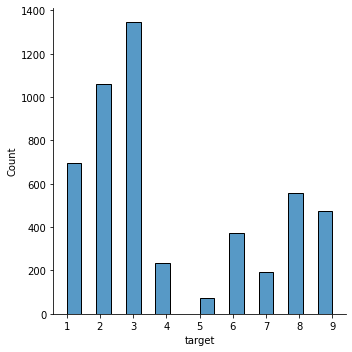

In [ ]:
sns.displot(data['target'])

Violin plot:


The distribution of virus attacks in the graph, how different virus attacks are occuring at different frequency.


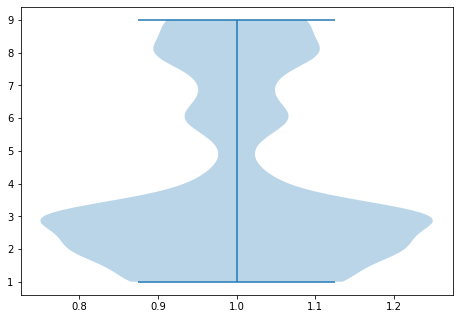

In [ ]:
# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data["target"])
plt.show()

Scatter plot:

The relation between feature Img99 & feature target is direct relation between  2 features.

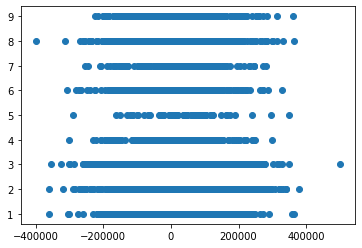

In [ ]:
plt.scatter(data.Img99,data.target)
plt.show()

Count plot:

This plot is showing me the total counts of the different virus types attacking the computer.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


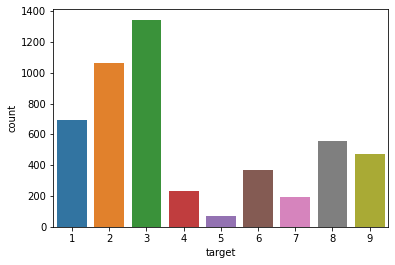

In [ ]:
sns.countplot(data['target'])
plt.show()

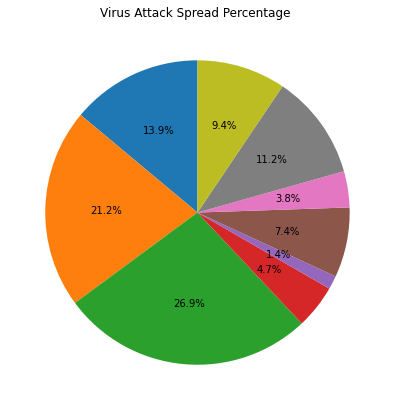

In [ ]:
target_percentage_effect = data['target'].value_counts().reset_index().sort_values('index')

plt.figure(figsize=(9,7))
plt.pie(list(target_percentage_effect['target'].values), 
        autopct = "%.1f%%", startangle=90)
plt.title('Virus Attack Spread Percentage ')
plt.show()

The highest percentage of attack is for virus of type 3 with 26.9% and least is for virus of type 5 with 1.4%

### Data sampling

In [ ]:
# input sample
X = data.drop(columns="target")
# output sample
y = pd.DataFrame(data.target)

print(np.shape(X), np.shape(y))

(4999, 1804) (4999, 1)


Data is sampled and is split as features and target that are taken as input and output samples

### Data Normalization:
Helps in Reducing redundant data and provides data consistency within the dataset.

Better and quicker execution.

In [ ]:
# Normaliser for Inputs
xscale = StandardScaler()
xscale.fit(X.values)
print(X.values.shape)
X_trans = xscale.transform(X.values)

(4999, 1804)


Now I am going to run different algorithms to check for accuracy on the whole data set

## 1. Random Forest


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.4, random_state=0)

I am splitting the virus data into train/test data sets with 40% reserved for testing

Hyperparameter tuning:

In [ ]:
param_grid = { 
    'n_estimators': [20,30,50],
    'max_features': ['auto', 'sqrt'] 
    }

rf_CV = GridSearchCV(estimator = RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5)
rf_CV.fit(X_train, y_train)
print(rf_CV.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

{'max_features': 'auto', 'n_estimators': 50}


Selecting the best hyper parameters for random forest algorithm with our chosen dataset
& I got max-features as auto & n-estimators as 50.

In [ ]:
clf = RandomForestClassifier(random_state=0, max_features='auto', n_estimators=50).fit(X_train, y_train)

# Now measure its performance with the test data
rf1 = clf.score(X_test, y_test)
rf1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.91

Now I built an RF model for predicting virus classifications using training data and got an accuracy of 91 %.

## K-Fold cross validation with the Random forest classifier:

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(clf, X_trans, y, cv=5)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[0.898      0.9        0.898      0.906      0.92592593]
0.9055851851851852


When using a K of 5, I am getting an accuracy score as : 90.67 & training time is less as number of k folds are less

When using a K of 10, I am  getting accuracy score as : 90.77 but training time is more as number of k folds are more

Hence I am using K of 5 instead of 10, because getting a increase of only 0.10 % on the cost of double training time is not worth & also the increase in score is very much negligible.

I conclude here with the increase in K-folds, there is a increase in score & training time too.

##Summary:

K-fold cross validation with the Random forest classifier is giving the best scores of all.

I have tried using different algorithms in combination with k-fold cross validation.

In conclusion random forest is classifying the virus attacks more accurately than any other algorithm.

## 2. Logistic regression



### Hyperparameter tuning: 

Selecting the best hyper parameters for logistic regrssion algorithm with our chosen dataset
& we got max-iterations as 50.

In [ ]:
param_grid = { 
    'max_iter': [10,30,50],
    }

lr_CV = GridSearchCV(estimator = LogisticRegression(random_state=0), param_grid=param_grid, cv=5)
lr_CV.fit(X_train, y_train)
print(lr_CV.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

{'max_iter': 50}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Build an LR model for predicting virus classifications using training data
clf = LogisticRegression(random_state=0, max_iter=50).fit(X_train, y_train)

# Now measure its performance with the test data
lg1 = clf.score(X_test, y_test)
lg1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.571

This algorithm was able to give an accuracy of only 57 % which interprets that the model failed to interpret the  minor aspects of the target which is type 5 and the rows are predicted incorrectly.

##K-Fold cross validation with Logistic Regression:

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(clf, X_trans, y, cv=10)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[0.536      0.54       0.624      0.566      0.516      0.512
 0.592      0.552      0.54       0.54108216]
0.5519082164328658


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


When using a K of 5, we are getting score as : 55.63 & training time is less as number of k folds are less

when using a K of 10, we are getting score as : 55.11 but training time is more as number of k folds are more

Hence I am using K of 5 instead of 10, because the score is higher. I conclude here with the increase in K-folds, there is a drop in score.

This model is not fit for our dataset.

## 3. Decision Tree Classifier:



### Hyperparameter tuning: 

Selecting the best hyper parameters for Decision Tree Classifier algorithm with our chosen dataset and  max-depth of 50.


In [ ]:
param_grid = { 
    'max_depth': [50, None],
    }

dt_CV = GridSearchCV(estimator = DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=5)
dt_CV.fit(X_train, y_train)
print(dt_CV.best_params_)

{'max_depth': 50}


In [ ]:
# Build an DT model for predicting virus classifications using training data
clf = DecisionTreeClassifier(max_depth=50).fit(X_train, y_train)

# Now measure its performance with the test data
dt1 = clf.score(X_test, y_test)
dt1

0.801

I got an accuracy of 80%.
I can say that the model is a good fit and is able to categorize all the output class labels and has generated upto 80% accuracy.

##K-Fold cross validation with Decision tree Classifier:

In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(clf, X_trans, y, cv=5)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 10 folds:
print(scores.mean())

[0.799      0.806      0.803      0.796      0.81081081]
0.8029621621621621


When using a K of 5, I am getting accuracy score as : 79.65 & training time is less as number of k folds are less

When using a K of 10, I am getting accuracy score as : 80.55 but training time is more as number of k folds are more

Hence I am using K of 5 instead of 10, because getting a increase of only 1.10 % on the cost of double training time is not worth and also the increase in score is very much negligable.

Hence, with the increase in K-folds, there is a increase in score & training time too.

### K-nearest Neighbors (KNN):


In [ ]:
# Build an KNN model for predicting virus classifications using training data
clf = KNeighborsClassifier().fit(X_train, y_train)

# Now measure its performance with the test data
knn1 = clf.score(X_test, y_test)
knn1

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.3075

As our dataset is very huge, I am not getting good score.

As dataset is already huge & performance is very poor, I am not doing any hyperparameter tuning.

The score is generated is 31 % which is the least accuracy because the algorithm is overfitting and not suitable for selection as best model.
It has generalized all the output label.

##K-Fold cross validation with KNN: 


In [ ]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(clf, X_trans, y, cv=5)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.346      0.317      0.313      0.293      0.31931932]
0.31766386386386386


When using a K of 5, I am getting score as : 31.76 & training time is less as number of k folds are less

When using a K of 10, I am getting score as : 31.88 but training time is more as number of k folds are more

Hence I am using K of 5 instead of 10, because getting a increase of only 0.12 % on the cost of double training time is not worth & also the increase in score is very much negligable.

I can say that with the increase in K-folds, there is a increase in score & training time too. 

Even the k-fold cross validation, has not been ale to increase the accuracy due to overfitting and generalising output labels. Hence this is not a best suitable model.

#Training the models again by using different feature extraction techniques

# 1. Univariative technique feature selection

This technique is to reducing the number of features, to reduce overfitting and improve the generalization of models. 

Helps to gain a better understanding of the features and their relationship to the target variable.

In [ ]:
selector = SelectKBest(f_classif, k=14)
selector.fit(X,y)
feature_score = pd.DataFrame({"score":selector.scores_,"p_values":selector.pvalues_},index=X.columns)
feature_score.nlargest(n=14,columns="score")

## Low p value --> Higher the relation with target column

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,score,p_values
Img0.1,1662.511303,0.000000e+00
FileSize,916.750862,0.000000e+00
size_asm,916.345864,0.000000e+00
line_count_asm,839.877442,0.000000e+00
Img107,455.431251,0.000000e+00
Img106,399.294340,0.000000e+00
Offset.1,352.468444,0.000000e+00
TB_ff,189.619312,7.978722e-281
db,173.123899,1.026067e-258
asm_commands_dd,165.215063,5.905459e-248


### Data sampling

In [ ]:
X = data[["Img0.1",
"FileSize",
"size_asm",
"line_count_asm",
"Img107",
"Img106",
"Offset.1",
"TB_ff",
"db",
"asm_commands_dd",
"section_names_.rdata",
"ExtendedAscii",
"section_names_.text",
"TB_00"]]
y = data.target

print(np.shape(X), np.shape(y))

(4999, 14) (4999,)


### Data Normalization

In [ ]:
# Normaliser for Inputs
xscale = StandardScaler()
xscale.fit(X.values)
print(X.values.shape)
X_trans = xscale.transform(X.values)

(4999, 14)


Here 14 features are extracted to find the accuracy of data when trained and tested.

### Random forest


In [ ]:
# Split the virus data into train/test data sets with 40% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.4, random_state=0)

# Build an RF model for predicting virus classifications using training data
clf = RandomForestClassifier().fit(X_train, y_train)

# Now measure its performance with the test data
rf2 = clf.score(X_test, y_test)
rf2

0.9115

Score for random forest model with univariative technique is 89 % as the selected featured data is lower than that of original data.

This is mostly because of the data loss that might have happened while selecting only particular features.

But its almost negligable performance score loss.

### Logistic regression


In [ ]:
clf = LogisticRegression().fit(X_train, y_train)

# Now measure its performance with the test data
lg2 = clf.score(X_test, y_test)
lg2

0.5715

Score for logistic regression model with univariative technique selected featured data is higher than that of original data which is 57 %.

Mostly because logistic regression performs well with less amount of data and its performance score is quite good now.

### Decision tree

Score for decision tree model with univariative technique selected featured data is lower than that of original data.

Mostly because of the data loss happened while selecting only particular features.

But its almost negligable performance score loss.

In [ ]:
# Build an DT model for predicting virus classifications using training data
clf = DecisionTreeClassifier().fit(X_train, y_train)

# Now measure its performance with the test data
dt2 = clf.score(X_test, y_test)
dt2

0.809

### K-nearest neighbors

Score for KNN model with univariative technique selected featured data is higher than that of original data.

Mostly because KNN performs well with less amount of data, calculating distances between each data instance would be easier.

& its performance score is very good now.

In [ ]:
# Build an KNN model for predicting virus classifications using training data
clf = KNeighborsClassifier().fit(X_train, y_train)

# Now measure its performance with the test data
knn2 = clf.score(X_test, y_test)
knn2

0.3075

# 2. Information gain technique feature selection

Information gain calculates the reduction in entropy from the transformation of a dataset. 

It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [ ]:
mutual_info = mutual_info_classif(X,y)
mutual_info = pd.Series(mutual_info) 
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

# Higher the value --> Higher the dependency with target column

db                      1.024723
FileSize                1.020712
size_asm                1.016333
line_count_asm          0.970276
Img107                  0.953156
section_names_.rdata    0.946999
Img106                  0.923424
ExtendedAscii           0.922699
asm_commands_dd         0.860506
section_names_.text     0.820484
TB_ff                   0.792434
TB_00                   0.781511
Img0.1                  0.584095
Offset.1                0.315341
dtype: float64

### Data sampling

In [ ]:
X = data[["section_names_.data",
"ent_q_diff_diffs_2_min",
"ent_p_3",
"db",
"FileSize",
"__vbaStrI4",
"Img10.1",
"GetEnhMetaFilePaletteEntries",
"Img6.1",
"__vbaErrorOverflow"]]
y = data.target

print(np.shape(X), np.shape(y))

(4999, 10) (4999,)


### Data Normalization

In [ ]:
# Normaliser for Inputs
xscale = StandardScaler()
xscale.fit(X.values)
print(X.values.shape)
X_trans = xscale.transform(X.values)

(4999, 10)


10 Best features are extracted for this feature selection technique.

## Random forest

Score for random forest model with Information gain technique feature selection is 87% and is lower than that of original data.

Mostly because of the data loss happened while selecting only particular features.

But its almost negotigable performance score loss.

In [ ]:
# Split the virus data into train/test data sets with 40% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.4, random_state=0)

# Build an RF model for predicting virus classifications using training data
clf = RandomForestClassifier().fit(X_train, y_train)

# Now measure its performance with the test data
rf3 = clf.score(X_test, y_test)
rf3

0.905

## Logistic regression

Score for logistic regression model with information gain technique selected featured data is lower than that of original data.

Mostly because of the data loss happened while selecting only particular features.

& its performance score is very low now.

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)

# Now measure its performance with the test data
lg3 = clf.score(X_test, y_test)
lg3

0.5715

## Decision tree

Score for decision tree model with information gain technique selected featured data is lower than that of original data.

Mostly because of the data loss happened while selecting only particular features.

But its almost negligable performance score loss.

In [ ]:
# Build an DT model for predicting virus classifications using training data
clf = DecisionTreeClassifier().fit(X_train, y_train)

# Now measure its performance with the test data
dt3 = clf.score(X_test, y_test)
dt3

0.798

### K-nearest neighbors

Score for KNN model with information gain technique selected featured data is higher than that of original data.

Mostly because KNN performs well with less amount of data, calculating distances between each data instance would be easier.

& its performance score is quite good now.

In [ ]:
# Build an KNN model for predicting virus classifications using training data
clf = KNeighborsClassifier().fit(X_train, y_train)

# Now measure its performance with the test data
knn3 = clf.score(X_test, y_test)
knn3

0.3075

# 3. Feature importance

Feature importance allows you to understand the relationship between the features and the target variable

Reduces the dimensionality of the model

In [ ]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
feat_imp = dict()
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (X.columns[i],v))
	feat_imp[X.columns[i]] = v

Feature: section_names_.data, Score: 0.13692
Feature: ent_q_diff_diffs_2_min, Score: 0.22923
Feature: ent_p_3, Score: 0.17427
Feature: db, Score: 0.14187
Feature: FileSize, Score: 0.22359
Feature: __vbaStrI4, Score: 0.00459
Feature: Img10.1, Score: 0.04019
Feature: GetEnhMetaFilePaletteEntries, Score: 0.00577
Feature: Img6.1, Score: 0.04012
Feature: __vbaErrorOverflow, Score: 0.00346


In [ ]:
feat_imp = {k: v for k, v in sorted(feat_imp.items(), key=lambda item: item[1], reverse=True)}
feat_imp

count = 0
for i in feat_imp.keys():
    print(i, feat_imp[i])
    count += 1
    if count > 14:
        break

ent_q_diff_diffs_2_min 0.2292250012148478
FileSize 0.22358991248916388
ent_p_3 0.17427167965332174
db 0.14186631439060013
section_names_.data 0.13692272291626648
Img10.1 0.040193680860887766
Img6.1 0.0401155871176772
GetEnhMetaFilePaletteEntries 0.005769978423521473
__vbaStrI4 0.004588594683286721
__vbaErrorOverflow 0.0034565282504266273


### Data sampling

In [ ]:
X = data[["section_names_header",
"ent_q_diff_diffs_1_min",
"ent_q_diff_diffs_2_median",
"ent_p_7",
"TB_b1",
"TB_2f",
"_cexit",
"_exit",
"ent_q_diffs_18",
"ent_p_5",
"Offset.1",
"TB_da",
"misc_trap",
"TB_29",
"TB_ad"]]
y = data.target

print(np.shape(X), np.shape(y))

(4999, 15) (4999,)


### Data Normalization

In [ ]:
# Normaliser for Inputs
xscale = StandardScaler()
xscale.fit(X.values)
print(X.values.shape)
X_trans = xscale.transform(X.values)

(4999, 15)


15 most important features with best scores are selected to fit into a data model.

## Random forest

Score for random forest model with feature importance technique selected featured data is 90% and is lower than that of original data.

Mostly because of the data loss happened while selecting only particular features.

But its almost negligable performance score loss.

In [ ]:
# Split the virus data into train/test data sets with 40% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.4, random_state=0)

# Build an RF model for predicting virus classifications using training data
clf = RandomForestClassifier().fit(X_train, y_train)

# Now measure its performance with the test data
rf4 = clf.score(X_test, y_test)
rf4

0.901

## Logistic regression

Score for logistic regression model with feature importance technique selected featured data is lower than that of original data.

Mostly because of the data loss happened while selecting only particular features.

& its performance score is very low now.

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)

# Now measure its performance with the test data
lg4 = clf.score(X_test, y_test)
lg4

0.381

## Decision tree

Score for decision tree model with feature importance technique selected featured data is lower than that of original data.

Mostly because of the data loss happened while selecting only particular features.

But its almost negligable performance score loss.

In [ ]:
# Build an DT model for predicting virus classifications using training data
clf = DecisionTreeClassifier().fit(X_train, y_train)

# Now measure its performance with the test data
dt4 = clf.score(X_test, y_test)
dt4

0.8025

### K-nearest neighbors

Score for KNN model with feature importance technique selected featured data is higher than that of original data with 59 % accuracy.

Mostly because KNN performs well with less amount of data, calculating distances between each data instance would be easier.

& its performance score is increased now.

In [ ]:
# Build an KNN model for predicting virus classifications using training data
clf = KNeighborsClassifier().fit(X_train, y_train)

# Now measure its performance with the test data
knn4 = clf.score(X_test, y_test)
knn4

0.592

# Performance comparision Graph

[0.91, 0.9115, 0.905, 0.901]


Text(0.5, 1.0, 'Performance score comparision of Random forest Algorithm')

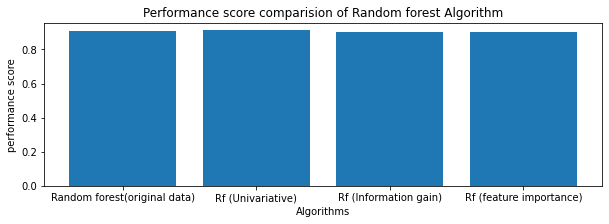

In [ ]:
algorithms = ['Random forest(original data)', 'Rf (Univariative)', 'Rf (Information gain)', 'Rf (feature importance)']
percentage = [rf1, rf2, rf3, rf4]
print(percentage)

plt.figure(figsize=[10,3])
plt.bar(algorithms, percentage)
plt.xlabel("Algorithms")
plt.ylabel("performance score")
plt.title("Performance score comparision of Random forest Algorithm")

When I compare the accuracy scores through the graph with all the Random Forest Algorithms, we can see that the accuracy of Random Forest Algorithm with Univariate Feature Selection technique is much higer with 91.115 %.

[0.571, 0.5715, 0.5715, 0.381]


Text(0.5, 1.0, 'Performance score comparision of Logistic regression Algorithm')

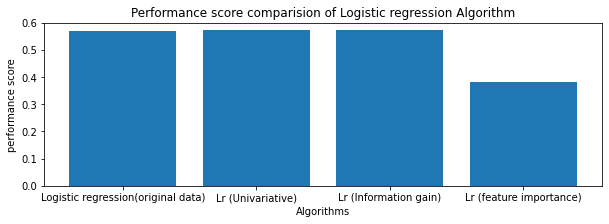

In [ ]:
algorithms = ['Logistic regression(original data)', 'Lr (Univariative)', 'Lr (Information gain)', 'Lr (feature importance)']
percentage = [lg1, lg2, lg3, lg4]
print(percentage)

plt.figure(figsize=[10,3])
plt.bar(algorithms, percentage)
plt.xlabel("Algorithms")
plt.ylabel("performance score")
plt.title("Performance score comparision of Logistic regression Algorithm")

When I compare the accuracy scores through the graph with all the Logistic Regression Algorithms, we can see that the accuracy of Logistic Regression Algorithms with Univariate Feature Selection technique and Information Gain Technique is high with 57 % accuracy.

[0.801, 0.809, 0.798, 0.8025]


Text(0.5, 1.0, 'Performance score comparision of Decision tree Algorithm')

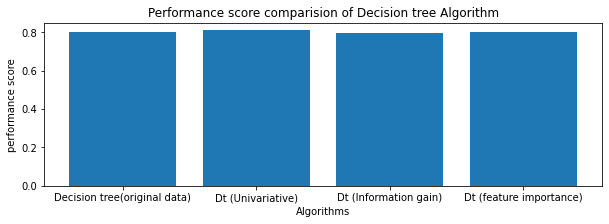

In [ ]:
algorithms = ['Decision tree(original data)', 'Dt (Univariative)', 'Dt (Information gain)', 'Dt (feature importance)']
percentage = [dt1, dt2, dt3, dt4]
print(percentage)

plt.figure(figsize=[10,3])
plt.bar(algorithms, percentage)
plt.xlabel("Algorithms")
plt.ylabel("performance score")
plt.title("Performance score comparision of Decision tree Algorithm")

When I compare the accuracy scores through the graph with all the Decision Tree Classifier Algorithms, we can see that the accuracy of it is high on the original data set with all features as the model is able to predict accurately with all features with 80.3 % accuracy.

[0.3075, 0.3075, 0.3075, 0.592]


Text(0.5, 1.0, 'Performance score comparision of KNN Algorithm')

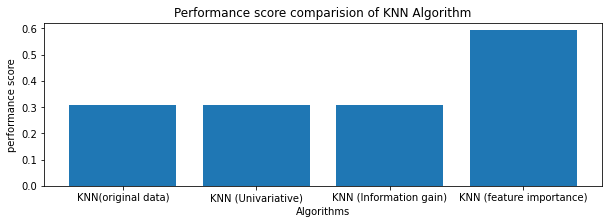

In [ ]:
algorithms = ['KNN(original data)', 'KNN (Univariative)', 'KNN (Information gain)', 'KNN (feature importance)']
percentage = [knn1, knn2, knn3, knn4]
print(percentage)

plt.figure(figsize=[10,3])
plt.bar(algorithms, percentage)
plt.xlabel("Algorithms")
plt.ylabel("performance score")
plt.title("Performance score comparision of KNN Algorithm")

For KNN, KNN with feature Importance gives highest accuracy of 59% than other algorithms.

#Conclusion

The k-fold cross validation method is helping in reducing the training time of the models.

K-fold cross validation with the random forest classifier is giving the best scores of all.

I have tried using different algorithms in combination with k-fold cross validation.


Random Forest is the best model among all algorithms as the model is generating high accuracy test scores and is not overfitting.It is able to categorise the output labels well as compared to other models. So, Random Forest is classifying the virus attacks more accurately and I would use that for classifying the virus attacks accurately.

